## 학습목표

머신러닝 모델의 성능을 평가하고, 올바른 매개변수를 선택하는 방법을 이해한다.

1. 모델의 일반화 성능을 평가(측정)하는 법

- 교차 검증 : 안정적인 일반화 성능 측정 방법

- 평가 지표
 - 이진/다중 분류의 평가 지표
 > 정확도, 오차 행렬, 분류 리포트,  <br>
 > 정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

 - 회귀의 평가 지표
 > \\( R^2 \\) , 평균제곱오차, 평균절대값오차


2. 매개변수를 튜닝하여 일반화 성능을 개선

- 그리드 서치(grid search) : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도
- 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요

## 학습/테스트 데이터 세트 분리

- 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 예측 정확도 100% 가 됨
= 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것이 중요
- 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해 보는 것도 매우 중요

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
```
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
```
Parameter

- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25) <br>
(전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지) <br>
(test_size 를 통상적으로 사용하기 때문에 잘 사용되지 않음)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) <br>
(호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. 지정하지 않으면 호출 시 무작위로 데이터를 분리하므로 수행할 때마다 다른 학습/테스트용 데이터를 생성)

- shuffle : 셔플여부설정 (default = True) <br>
(데이터를 분리하기 전에 미리 섞을지를 결정. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용)

- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

Return

- X_train, X_test, y_train, y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
- X_train, X_test : arrays에 레이블(y) 없이 데이터만 넣었을 경우의 반환


In [1]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install mglearn

# 교차 검증 (Cross Validation)

- 교차검증 : 일반화 성능 향상을 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 평가 방법
 - 데이터 편중을 막기 위함
 - 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

- k-겹 교차검증 : 데이터를 폴드(fold)라는 거의 비슷한 크기의 부분집합을 k개로 분리하고 각 부분집합의 정확도를 측정

- scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현


[cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

```
cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)

Return
- 교차 검증 결과 정확도 점수의 배열

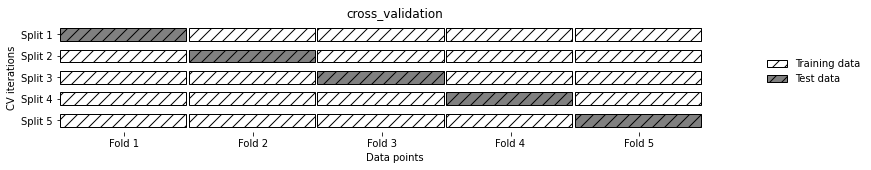

In [3]:
import mglearn
# 5-겹 교차 검증에서의 데이터 분할
mglearn.plots.plot_cross_validation()

In [4]:
# 교차 검증을 간편하게
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
iris.keys()

model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(model_lr, iris.data, iris.target)
print("교차 검증 점수: ", scores)

scores = cross_val_score(model_dt, iris.data, iris.target)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 점수:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]


- cross_val_score의 기본값은 5-겹 교차 검증이므로 정확도 값이 5개가 반환 <br>
(scikit-learn 0.22 부터 기본값은 5-겹, 기존 기본값 3-겹)

- 폴드의 수는 cv 매개변수를 사용해서 바꿀 수 있음



In [5]:
# 교차 검증 점수
scores = cross_val_score(model_lr, iris.data, iris.target, cv=3)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.98 0.96 0.98]


- 보통 교차 검증의 정확도를 간단하게 나타내려면 평균을 사용

In [6]:
# 교차 검증 평균 점수

print("교차 검증 점수: ", scores.mean())

교차 검증 점수:  0.9733333333333333


- 이 모델의 정확도가 대략 96%일 것으로 기대
= 5-겹 교차 검증 결과값이 폴드에 따라 비교적 차이가 발생
- 훈련에 사용한 폴드에 매우 의존적이거나 데이터세트가 작기 때문일 수 있음


여러 개의 평가 지표 반환 교차 검증 함수

[cross_validate()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

```
cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)
- return_train_score : 훈련 점수 포함 여부

Return
- 교차 검증 결과 정확도 점수의 배열

In [7]:
# 분할마다 훈련과 테스트에 걸린 시간을 담은 여러 개의 평가 지표 딕셔너리를 반환
from sklearn.model_selection import cross_validate

res = cross_validate(model_lr, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.04388547, 0.04488134, 0.04144239, 0.04986668, 0.03690243]),
 'score_time': array([0.00167727, 0.        , 0.00099635, 0.00099683, 0.00099659]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [8]:
# 판다스를 사용하여 결과값을 출력하고 평균을 계산
import pandas as pd

df = pd.DataFrame(res)

display(df)
print(df.mean())

,fit_time,score_time,test_score,train_score
0,0.043885,0.001677,0.966667,0.966667
1,0.044881,0.000000,1.000000,0.966667
2,0.041442,0.000996,0.933333,0.983333
3,0.049867,0.000997,0.966667,0.983333
4,0.036902,0.000997,1.000000,0.975000


fit_time       0.043396
score_time     0.000933
test_score     0.973333
train_score    0.975000
dtype: float64


#### 교차 검증 장단점

- 테스트 세트에 골고루 각 샘플이 정확하게 한 번씩 들어감
- 교차 검증의 점수가 높으면 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화됨
- 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음
- 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용
> 5-겹의 경우 매 반복에서 4/5 (80%)의 데이터를 모델 학습에 사용. <br> 
> 10-겹의 경우 90%를 사용

- 연산 비용이 늘어나는 단점이 있음 (k배 더 느림)


### 계층별 k-겹 교차 검증 

- 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지는 않음

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 결과에서 볼 수 있듯이 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2이다.

- 이 데이터에 3-겹 교차 검증을 적용한다면 첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0이 됨

- 두 번째, 세 번째도 같은 방법으로 정확도는 0이 됨 

- 단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용

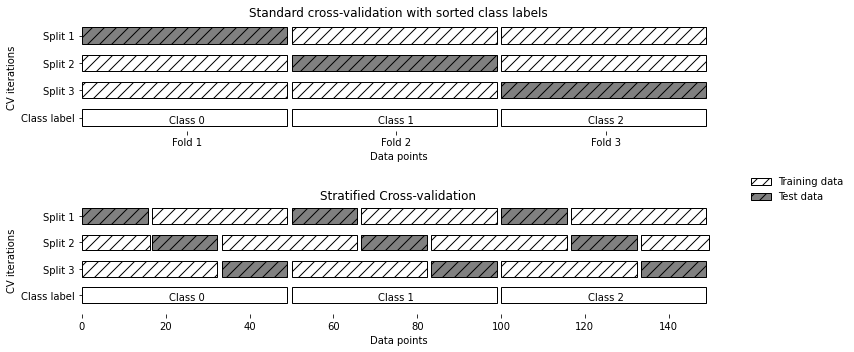

In [10]:
# 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔
mglearn.plots.plot_stratified_cross_validation()

- 대부분 회귀에서는 k-겹 교차 검증
- 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동

In [11]:
# cv 매개변수에 교차 검증 분할기 cross-validation splitter를 사용하여 
# 데이터를 분할할 때 세밀하게 제어
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
scores = cross_val_score(model_dt, iris.data, iris.target, cv=kfold)
print("교차 검증 점수: ", scores)


교차 검증 점수:  [0. 0. 0.]


In [12]:
# 데이터를 분할하기 전에 섞어주면 결과가 향상
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(model_dt, iris.data, iris.target, cv=kfold)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.96 0.96 0.96]


### 임의 분할 교차 검증 (shuffle-split cross-validation)

- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용
- train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용 가능
- 데이터 부분 샘플링(subsampling)하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됨



[ShuffleSplit()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

```
ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
```
- train_size 만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 (훈련 세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할

- n_splits 횟수만큼 반복

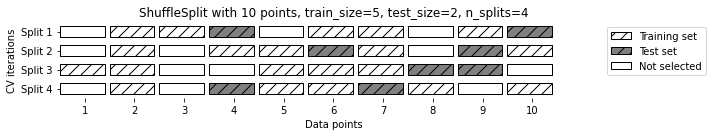

In [13]:
# 10개의 데이터 포인트에 train_size=0.5, test_size=0.2, n_splits=4를 적용한 ShuffleSplit
mglearn.plots.plot_shuffle_split()

In [14]:
# 교차 검증 점수
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=10, test_size=0.5, train_size=0.5, random_state=0)
scores = cross_val_score(model_dt, iris.data, iris.target, cv=ss)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.96       0.92       0.96       0.93333333 0.96       0.94666667
 0.93333333 1.         0.96       0.94666667]


### 그룹별 교차 검증 (groups cross-validation)

- 데이터 안에 매우 연관된 그룹이 있을 때
- 예: 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 의료 애플리케이션

- groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것으로 클래스 레이블과 혼동해서는 안됨

[GroupKFold()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html)

```
GroupKFold(n_splits=5)
```
- n_splits : 폴드 수 (2 이상)


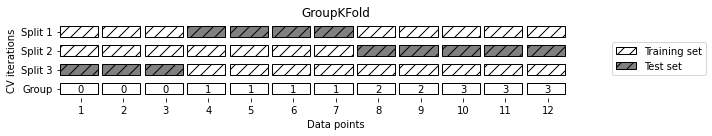

In [15]:
# 레이블에 기반한 GroupKFold 분할
mglearn.plots.plot_group_kfold()

In [16]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]

# 교차 검증 점수
gkf = GroupKFold(n_splits=3)
scores = cross_val_score(model_lr, X, y, groups, cv=gkf)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.75       0.6        0.66666667]


### 반복 교차 검증

- 데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행

- RepeatedKFold : 회귀에 사용
- RepeatedStratifiedKFold : 분류에 사용

In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold

# 교차 검증 점수
# 교차 검증 평균 점수
rskfold = RepeatedStratifiedKFold(random_state=0)
display(rskfold)

scores = cross_val_score(model_lr, iris.data, iris.target, cv=rskfold)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0)

교차 검증 점수:  [0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 1.
 0.9        0.96666667 1.         1.         0.93333333 1.
 1.         0.93333333 0.96666667 1.         0.9        1.
 0.9        1.         1.         0.93333333 0.96666667 0.96666667
 0.93333333 0.9        1.         1.         1.         0.96666667
 0.93333333 0.96666667 1.         0.96666667 0.93333333 1.
 0.96666667 0.9        0.96666667 1.         0.96666667 1.
 0.9        0.96666667 0.96666667 0.96666667 0.96666667 0.9
 0.96666667 1.        ]
교차 검증 평균 점수:  0.9640000000000001


- 전체 검증 점수는 n_splits * n_repeats 개수만큼 만들어짐

# 그리드 서치 (Grid Search)

- 매개변수을 선택하는 것은 머신러닝에서 중요한 일

- GRID_SEARCH : 관심 있는 매개변수들을 대상으로 가능한 모든 조합 시도하는 것

### 검증 세트

- 매개변수를 조정하기 위해 테스트 세트를 사용하면 모델이 얼마나 좋은지 평가하는 데는 더 이상 사용할 수 없음
- 평가를 위해 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요

- 데이터를 세 개의 세트로 만들어 이 문제를 해결
 - 훈련 세트로는 모델을 작성
 - 검증 (또는 개발) 세트로는 모델의 매개변수를 선택
 - 테스트 세트로는 선택된 매개변수의 성능을 평가

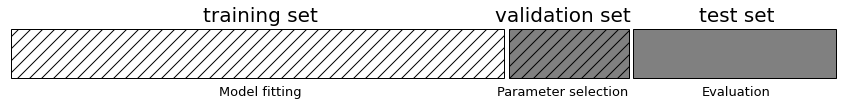

In [18]:
mglearn.plots.plot_threefold_split()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

# 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))



훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


## 교차 검증을 사용한 그리드 서치

In [22]:
best_score = 0

# 교차 검증을 사용한 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        # 교차 검증 이용
        scores = cross_val_score(svm, X_trainval, y_trainval)
        score = scores.mean()

        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.97
최적 파라미터:  {'C': 10, 'gamma': 0.1}
최적 파라미터에서 테스트 세트 점수: 0.97


- 5-겹 교차 검증으로 C와 gamma 설정에 대한 SVM 정확도를 평가하려면 36 x 5 = 180 개의 모델이 필요

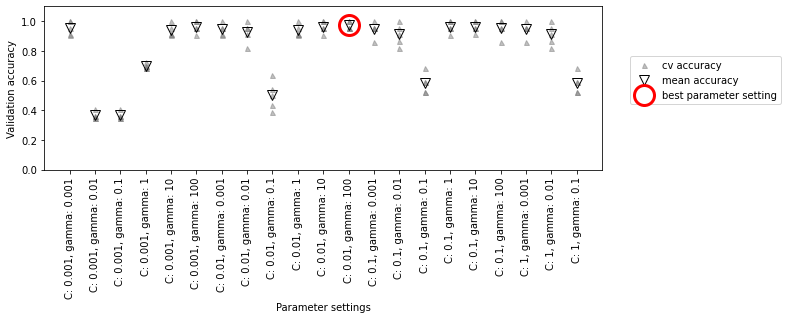

In [23]:
# 최적의 매개변수를 선택하는 방법
# 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시
mglearn.plots.plot_cross_val_selection()

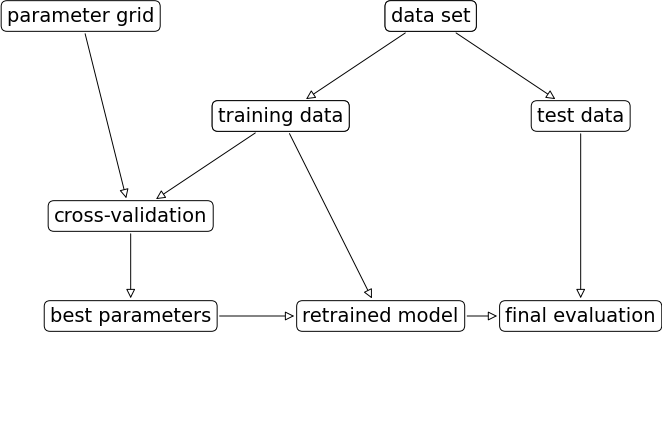

In [24]:
# 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름
mglearn.plots.plot_grid_search_overview()

## GridSearchCV 메소드를 이용한 그리드서치

In [26]:
# 매개변수 그리드
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# GridSearchCV
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# grid_search.fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

- GridSearchCV 객체에 fit() 매서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동을 만듬

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict()와 score() 메서드 제공

- GridSearchCV 분류 : StratifiedKFold 회귀 : KFold

- 사용에 따라서는 predict_proba, decision_function도 제공

In [28]:
# 테스트 세트 점수
grid_search.score(X_test, y_test)

0.9736842105263158

In [29]:
# 최적 매개변수
# 최고 교차 검증 점수
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

- 최적 매개 변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_

- grid_search 객체가 predict와 score 메서드를 가지고 있으므로 예측이나 모델을 평가하기 위해 best_estimator_ 속성을 사용할 필요가 없다.

In [27]:
# 최고 성능 모델


## 교차 검증 결과 분석

- 교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는 데 도움이 됨

In [28]:
import pandas as pd
import numpy as np

# Pandas에서 보는 옵션 설정

# DataFrame으로 변환

# 처음 다섯 개 행을 출력


### C와 gamma 시각화

 

In [29]:
import mglearn

# 교차 검증 평균 점수 히트맵 그래프


- 정확도가 높으면 -> 밝은 색 / 낮으면 -> 어두운 색 

- SVC 가 매개변수에 민감 

 

### 바람직하지 못한 예

- 검색 범위가 적절하게 선택되지 않은 경우

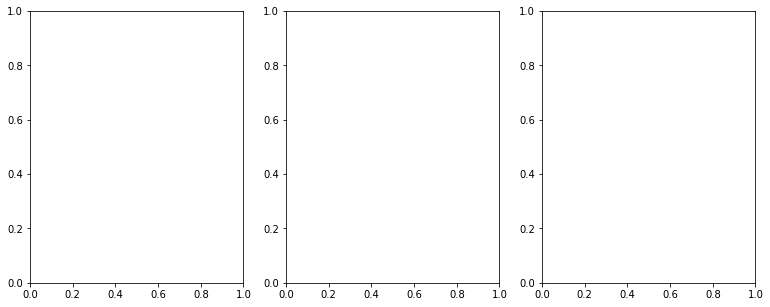

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma':  np.logspace(-7, -2, 6)}

# 검색 범위가 적절하게 선택되지 않은 경우
# 교차 검증 평균 점수 히트맵 그래프



- 첫 번째 그래프는 점수 변화가 없어서 -> 전체 매개변수 그리드가 같은 색 -> 부적절하게 발생

- 그러나 매개변수 설정이 바뀌어도 정확에 변화 없다면 -> 매개변수가 전혀 중요하지 않은 것 

 - 두 번째 그래프 세로 띠 -> Gamma 매개 변수만 정확도에 영향을 준다는 뜻 

- 교차 검증 점수를 토대로 매개변수 그리드를 튜닝하는 것 -> 아주 안전한 방법 

# 정리

1. 교차 검증을 해야 한다.
> 데이터를 분리해서 사용. 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복
 - 모델 학습에는 훈련 데이터
 - 모델과 매개변수 선택에는 검증 데이터
 - 모델 평가에는 테스트 데이터
 
 > 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용


2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.
> 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 함
 - 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없음
 - 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미침